In [42]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

nnfs.init()

In [54]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        #weights shape = (n_inputs, n_neurons)
        self.weights = .01*np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, input):
        #input shape = (1, len(input))
        self.output = np.dot(input, self.weights) + self.biases

X, y = spiral_data(samples=100, classes = 3)

#create a layer with 2 input feature and 3 neutrons
#input shape (300,2)
#layer shape (2,3)
#(300,2) *(2,3) = (300, )
layer1 = Layer_Dense(2, 3)

#forward pass
layer1.forward(X)


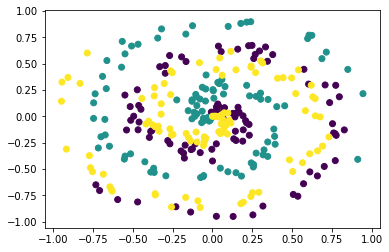

In [55]:
plt.scatter(X[:,0], X[:,1], c=y)